In [1]:
import pandas as pd

In [6]:
df_initial = pd.read_csv("/content/winemag-data-130k-v2.csv") #change the path
df_reviews = pd.read_csv('/content/scraped_reviews_final.csv') #change the path

In [7]:
df_reviews = df_reviews.drop_duplicates(subset='id', keep='first')
print("Merged DataFrame shape after dropping dubs:", df_reviews.shape)

Merged DataFrame shape after dropping dubs: (6300, 14)


You may notice that is lacks 13 wines from the number provided in the thesis. It is due to manuall addition of 13 wines from Moldova (mum asked)

In [8]:
final_df = df_reviews.merge(df_initial, how='left', on='title')
final_df = final_df.drop_duplicates(subset='title', keep='first')
print(final_df.shape)

(6300, 27)


<Axes: >

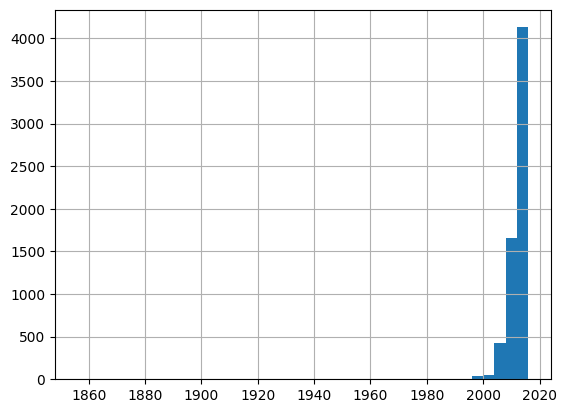

In [9]:
def extract_vintage_from_title(df, title_col='title'):
    df['vintage'] = df[title_col].str.extract(r'(\b\d{4}\b)', expand=False)

    df['vintage'] = pd.to_numeric(df['vintage'], errors='coerce')

    return df

final_df = extract_vintage_from_title(final_df)
final_df['vintage'].hist(bins=40)

In [11]:
variety_to_color = {
    'Pinot Noir': 'Red',
    'Chardonnay': 'White',
    'Cabernet Sauvignon': 'Red',
    'Red Blend': 'Red',
    'Nebbiolo': 'Red',
    'Riesling': 'White',
    'Syrah': 'Red',
    'Rosé': 'Rosé',
    'Malbec': 'Red',
    'Zinfandel': 'Red',
    'Tempranillo': 'Red',
    'Bordeaux-style Red Blend': 'Red',
    'Sangiovese': 'Red',
    'Sauvignon Blanc': 'White',
    'Shiraz': 'Red',
    'Cabernet Franc': 'Red',
    'Gamay': 'Red',
    'Pinot Gris': 'White',
    'Merlot': 'Red',
    'Tempranillo Blend': 'Red',
    'Gewürztraminer': 'White',
    'White Blend': 'White',
    'Champagne Blend': 'White',
    'Barbera': 'Red',
    'Grenache': 'Red',
    'Melon': 'White',
    'Viognier': 'White',
    'Garnacha': 'Red',
    'Petite Sirah': 'Red',
    'Chenin Blanc': 'White',
    'Bordeaux-style White Blend': 'White',
    'Verdicchio': 'White',
    'Tinta de Toro': 'Red',
    'Turbiana': 'White',
    'Garganega': 'White',
    'Aglianico': 'Red',
    'Glera': 'White',
    'Pinot Grigio': 'White',
    'Albariño': 'White',
    'Vernaccia': 'White',
    'Pinot Blanc': 'White',
    'Torrontés': 'White',
    'Petit Verdot': 'Red',
    "Nero d'Avola": 'Red',
    'Mourvèdre': 'Red',
    'Tinto Fino': 'Red',
    'Moscato': 'White',
    'Sauvignon': 'White',
    'Rhône-style Red Blend': 'Red',
    'Primitivo': 'Red',
    'Verdejo': 'White',
    'Mencía': 'Red',
    'Grüner Veltliner': 'White',
    'Meritage': 'Red',
    'Sparkling Blend': 'White',
    'Montepulciano': 'Red',
    'Greco': 'White',
    'Bonarda': 'Red',
    'Fiano': 'White',
    'Arneis': 'White',
    'Vermentino': 'White',
    'Grenache Blanc': 'White',
    'Muscat': "Red, White",
    'Pinot Bianco': 'White',
    'Nerello Mascalese': 'Red',
    'Monastrell': 'Red',
    'Petit Manseng': 'White',
    'Sémillon': 'White',
    'Grillo': 'White',
    'Lagrein': 'Red',
    'Sylvaner': 'White',
    'Dolcetto': 'Red',
    'Sagrantino': 'Red',
    'Rosato': 'Rosé',
    'Lambrusco di Sorbara': 'Red',
    'Gros and Petit Manseng': 'White',
    'Cinsault': 'Red',
    'Negroamaro': 'Red',
    'Rhône-style White Blend': 'White',
    'Frappato': 'Red',
    'Pinot Nero': 'Red',
    'Cortese': 'White',
    'Teroldego': 'Red',
    'Xarel-lo': 'White',
    'Sauvignon Blanc-Semillon': 'White',
    'Roussanne': 'White',
    'Tempranillo-Garnacha': 'Red',
    'Garnacha Blanca': 'White',
    'Godello': 'White',
    'Carricante': 'White',
    'Cabernet Sauvignon-Shiraz': 'Red',
    'Tinta Fina': 'Red',
    'Lambrusco Grasparossa': 'Red',
    'Port': 'Red',
    'Shiraz-Viognier': 'Red',
    'Nero di Troia': 'Red',
    'Graciano': 'Red',
    'Marsanne': 'White',
    'Malbec-Cabernet Sauvignon': 'Red',
    'Tannat': 'Red',
    'Tempranillo-Cabernet Sauvignon': 'Red',
    'Auxerrois': 'White',
    'Carignane': 'Red',
    'Cannonau': 'Red',
    'Albana': 'White',
    'Vidal Blanc': 'White',
    'Rosado': 'Rosé',
    'Tempranillo Blanco': 'Red',
    'Traminette': 'White',
    'Shiraz-Cabernet Sauvignon': 'Red',
    'Trousseau': 'Red',
    'Chasselas': 'White',
    'Cabernet Merlot': 'Red',
    'Friulano': 'White',
    'Aligoté': 'White',
    'Bobal': 'Red',
    'Colombard': 'White',
    'Ribolla Gialla': 'White',
    'Touriga Nacional': 'Red',
    'Trebbiano': 'White',
    'Fumé Blanc': 'White',
    'Catarratto': 'White',
    'Counoise': 'Red',
    'Nosiola': 'White',
    'Carmenère': 'Red',
    'Charbono': 'Red',
    'Kerner': 'White',
    'Syrah-Viognier': 'Red',
    'Claret': 'Red',
    'Pecorino': 'White',
    'Verdelho': 'White',
    'Moscatel': 'White',
    'Gamay Noir': 'Red',
    'Blaufränkisch': 'Red',
    'Pallagrello Bianco': 'White',
    'Blanc du Bois': 'White',
    'Pinot Auxerrois': 'White',
    'Cesanese': 'Red',
    'Albanello': 'White',
    'Freisa': 'Red',
    'Corvina': 'Red',
    'Petite Verdot': 'Red',
    'Merlot-Malbec': 'Red',
    'Malbec-Syrah': 'Red',
    'Nascetta': 'White',
    'Cabernet Blend': 'Red',
    'Syrah-Grenache': 'Red',
    'Syrah-Cabernet Sauvignon': 'Red',
    'Inzolia': 'White',
    'Mondeuse': 'Red',
    'Malvasia': 'White',
    'Poulsard': 'Red',
    'Timorasso': 'White',
    'Viura': 'White',
    'Tocai Friulano': 'White',
    'Shiraz-Grenache': 'Red',
    'Grenache-Syrah': 'Red',
    'Gros Manseng': 'White',
    'Fer Servadou': 'Red',
    'Manzoni': 'White',
    'Syrah-Petit Verdot': 'Red',
    'Shiraz-Roussanne': 'Red',
    'Cabernet-Shiraz': 'Red',
    'Tinto del Pais': 'Red',
    'Souzao': 'Red',
    'Nuragus': 'White',
    'Pinotage': 'Red',
    'G-S-M': 'Red',
    'Zweigelt': 'Red',
    'Passerina': 'White',
    'Cabernet Franc-Merlot': 'Red',
    'Schiava': 'Red',
    'Ruché': 'Red',
    'Dornfelder': 'Red',
    'Traminer': 'White',
    'Cabernet Sauvignon-Sangiovese': 'Red',
    'Müller-Thurgau': 'White',
    'Malbec-Cabernet Franc': 'Red',
    'Jacquez': 'Red',
    'Syrah-Mourvèdre': 'Red',
    'Cabernet Sauvignon-Merlot': 'Red',
    'Malbec-Cabernet': 'Red',
    'Nerello Cappuccio': 'Red',
    'Falanghina': 'White',
    'Monastrell-Syrah': 'Red',
    'Cabernet Sauvignon-Merlot': 'Red',
    'Malbec-Cabernet': 'Red',
    'Seyval Blanc': 'White',
    'Pedro Ximénez': 'White',
    'Merseguera-Sauvignon Blanc': 'White',
    'Cabernet-Malbec': 'Red',
    'Vignoles': 'White',
    'Durif': 'Red',
    'Moscato Rosa': 'White',
    'Macabeo': 'White',
    'Chardonnay-Semillon': 'White',
    'Carignan': 'Red',
    'Petit Courbu': 'White',
    'Chardonnay-Viognier': 'White'
}

final_df['wine_color'] = final_df['variety'].map(variety_to_color)
final_df['wine_color'] = final_df['wine_color'].fillna('Unknown')
final_df['wine_color'].value_counts()

,count
wine_color,
Red,4176
White,1902
Rosé,212
"Red, White",9
Unknown,1


In [12]:
final_df.columns

Index(['Unnamed: 0.1', 'title', 'id', 'review_1', 'review_2', 'review_3',
       'review_4', 'review_5', 'review_6', 'review_7', 'review_8', 'review_9',
       'review_10', 'Unnamed: 0_x', 'Unnamed: 0_y', 'country', 'description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'taster_name', 'taster_twitter_handle', 'variety', 'winery', 'vintage',
       'wine_color'],
      dtype='object')

In [14]:
final_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0_x', 'Unnamed: 0_y', ], inplace=True)

In [21]:
final_df.to_csv('./wine_data_final.csv', index=False)